In [1]:
import pandas as pd 
import numpy as np 
import mesa
import geopandas as gpd 
from geopandas import GeoDataFrame
import os 
import random
import time
import glob
import networkx as nx 
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches

%matplotlib inline 

path = os.getcwd()
#rootpath = 'c:\\Users\\Gamelab\\Desktop\\RT\\Others\\Thesis\\Thesis_coding\\ABM\\Solar-Adoption-Model-ABM\\'
rootpath = '/Users/rtseinstein/Documents/GitHub/Solar-Adoption-Model-ABM/'
print(rootpath)

## geomap and income map from original file
# create geometry dict for mapping caseids to their actual location
#read in the shapefile of points
hhs = gpd.read_file(rootpath+'data/households_main/households_main.shp')
hhs = hhs.set_index('case_id')
geomap = hhs['geometry'].to_dict()
incomemap = hhs['income'].to_dict()


## timesteps and actual adoption curve in albany
timesteps = [2015,2016,2017,2018,2019,2020,2021]
actual_adoptioncurve = [1159,1771,2147,2363,2499,2623,2641]

/Users/rtseinstein/Documents/GitHub/Solar-Adoption-Model-ABM/


# Scenario- 1: Effect of Tax Credits :  46% 

## Segregated


 Model adoption curves:
 [1310, 2982, 3724, 5792, 6663, 7045, 7484]


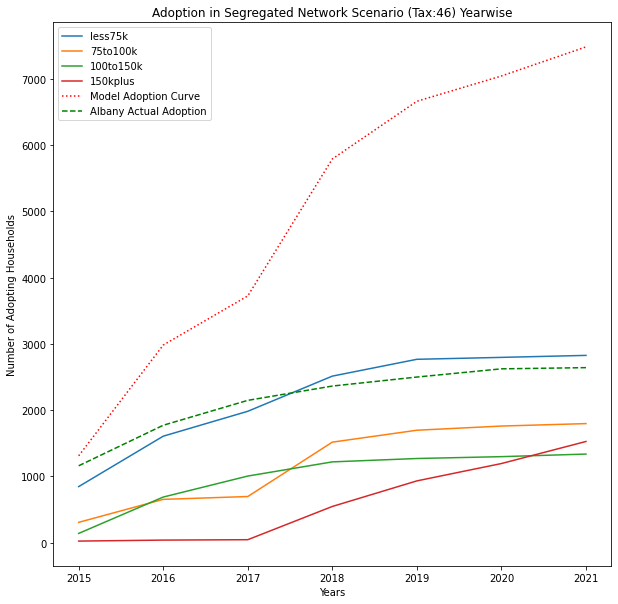

In [2]:
# concatenating all generated inputs into 1 big file
files = glob.glob(rootpath+'/experiment/segregated/scenario1/*.csv')
sample = pd.read_csv(files[0])

merged_file=pd.DataFrame(columns=sample.columns)
for f in files:
   merged_file= pd.concat([merged_file,pd.read_csv(f)])

#merged_file = pd.read_csv(rootpath+'experiment/segregated/yearwise/merged_yearwise_segregated.csv')
merged_file_subset = merged_file[['timestep','case_id','adoption_status']]  # to keep file small and manageable

## export the merged file if not merged already:
#merged_file.to_csv(rootpath+'experiment/segregated/yearwise/merged_yearwise_segregated.csv')
## get adoption curve for the simulation
adoption_numbers = []

for i in range(1,8):
    t= merged_file_subset.loc[merged_file_subset['timestep']==i]
    adoption_numbers.append(len(t.loc[t['adoption_status']==1]['case_id'].unique()))

print('\n Model adoption curves:\n',adoption_numbers)

## get adoption numbers per income group 
incomegroups={'less75k':[],'75to100k':[],'100to150k':[],'150kplus':[]}

for i in range(1,8): #timesteps
    t= merged_file.loc[merged_file['timestep']==i]
    t= t.loc[t['adoption_status']==1]
    t['income']= t['case_id'].map(incomemap)
    t = t.drop_duplicates(subset=['case_id'])
    a = t.groupby('income')['case_id'].count().to_dict()
    for k in a.keys():
        incomegroups[k].append(a[k])


#plotting
fig,ax = plt.subplots(figsize=(10,10))
timesteps= [2015,2016,2017,2018,2019,2020,2021]
for income in incomegroups.keys():
    plt.plot(timesteps,incomegroups[income],label=income)

plt.plot(timesteps,adoption_numbers,label='Model Adoption Curve',color='red',linestyle='dotted')
plt.plot(timesteps,actual_adoptioncurve,label='Albany Actual Adoption',color='green',linestyle='dashed')
plt.title('Adoption in Segregated Network Scenario (Tax:46) Yearwise')
plt.xlabel('Years')
plt.ylabel('Number of Adopting Households')
plt.legend()